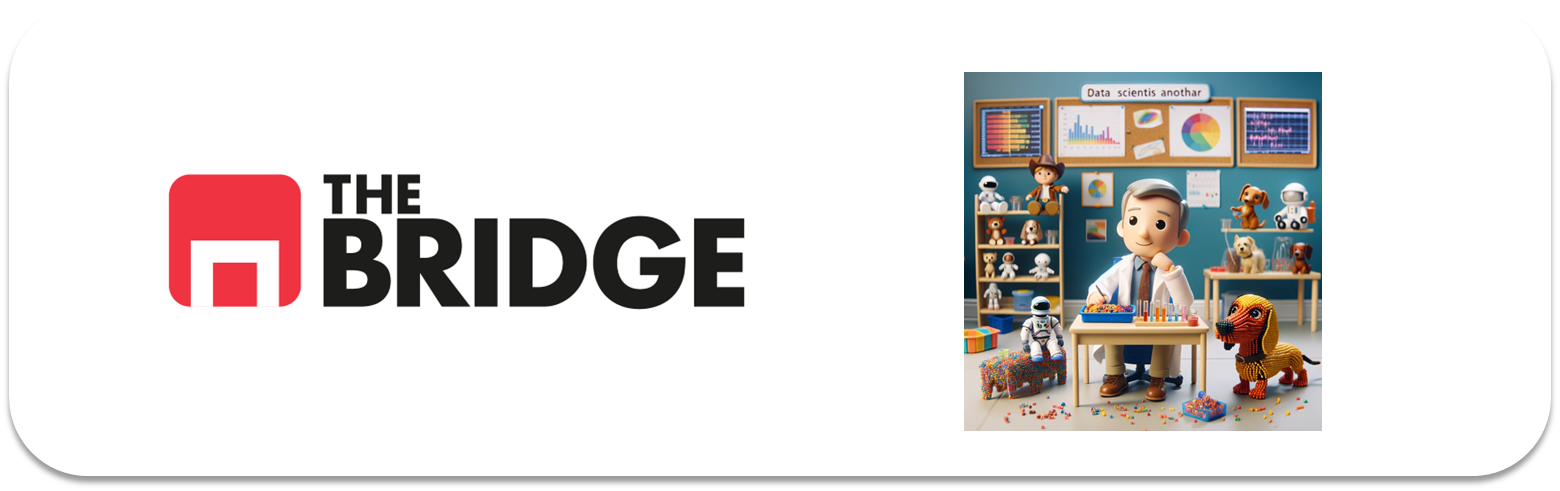

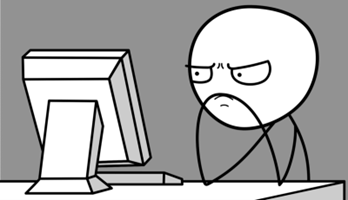

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
df = pd.read_csv("./data/admission_data.csv")
df.head(10)

,Unnamed: 0,Year,Major,Gender,Admission
0,0,1973,School of Medicine,F,Rejected
1,1,1973,Department of Economics,M,Accepted
2,2,1973,Other,F,Accepted
3,3,1973,Other,M,Accepted
4,4,1973,Other,M,Rejected
5,5,1973,Other,M,Rejected
6,6,1973,Department of Psychology,F,Accepted
7,7,1973,Other,M,Accepted
8,8,1973,Other,M,Rejected
9,9,1973,Department of Physics and Astronomy,M,Accepted


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB


### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [4]:
df.describe() # los datos actuales son todos referidos a 1973, esta variable no aporta valor actualmente, valorar eliminarla

,Unnamed: 0,Year
count,12763.000000,12763.0
mean,6381.000000,1973.0
std,3684.505078,0.0
min,0.000000,1973.0
25%,3190.500000,1973.0
50%,6381.000000,1973.0
75%,9571.500000,1973.0
max,12762.000000,1973.0


### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [ ]:

df.Major.value_counts() # frecuencia absoluta hay 7924 valores sin especificar departamento

Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

In [ ]:
df.Major.value_counts()/len(df)*100 # supone un 62% de la muestra, lo que es muy significativo

Major
Other                                                      62.085717
Department of Physics and Astronomy                         9.762595
School of Medicine                                          7.192666
Department of Mechanical Engineering                        6.205438
Department of Psychology                                    5.594296
Department of Economics                                     4.583562
School of Political Science and International Relations     4.575727
Name: count, dtype: float64

In [11]:
columnas_categoricas = list(df.columns)
columnas_categoricas

['Unnamed: 0', 'Year', 'Major', 'Gender', 'Admission']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False, giro = 45):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=giro)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

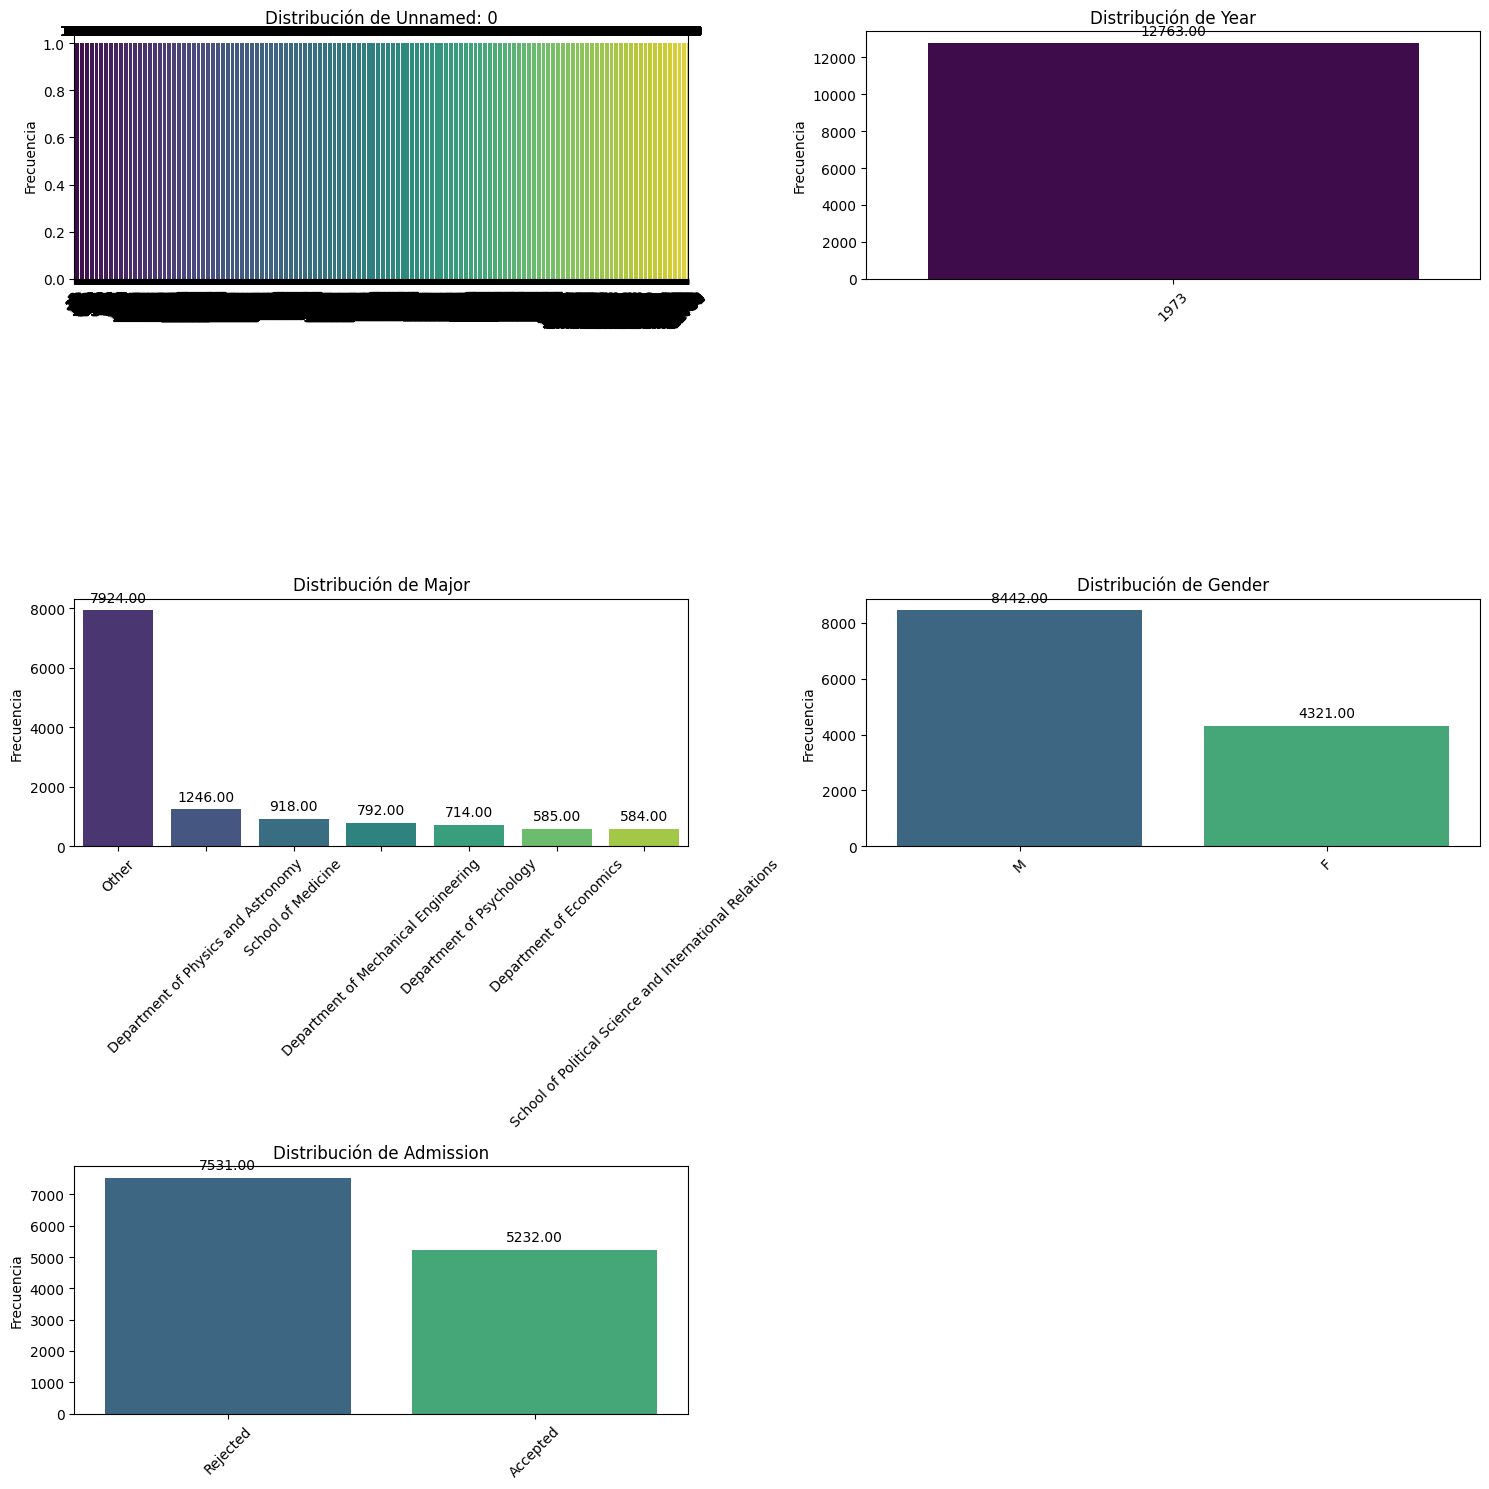

In [15]:
pinta_distribucion_categoricas(df, columnas_categoricas, mostrar_valores=True) # grafica de datos absolutos

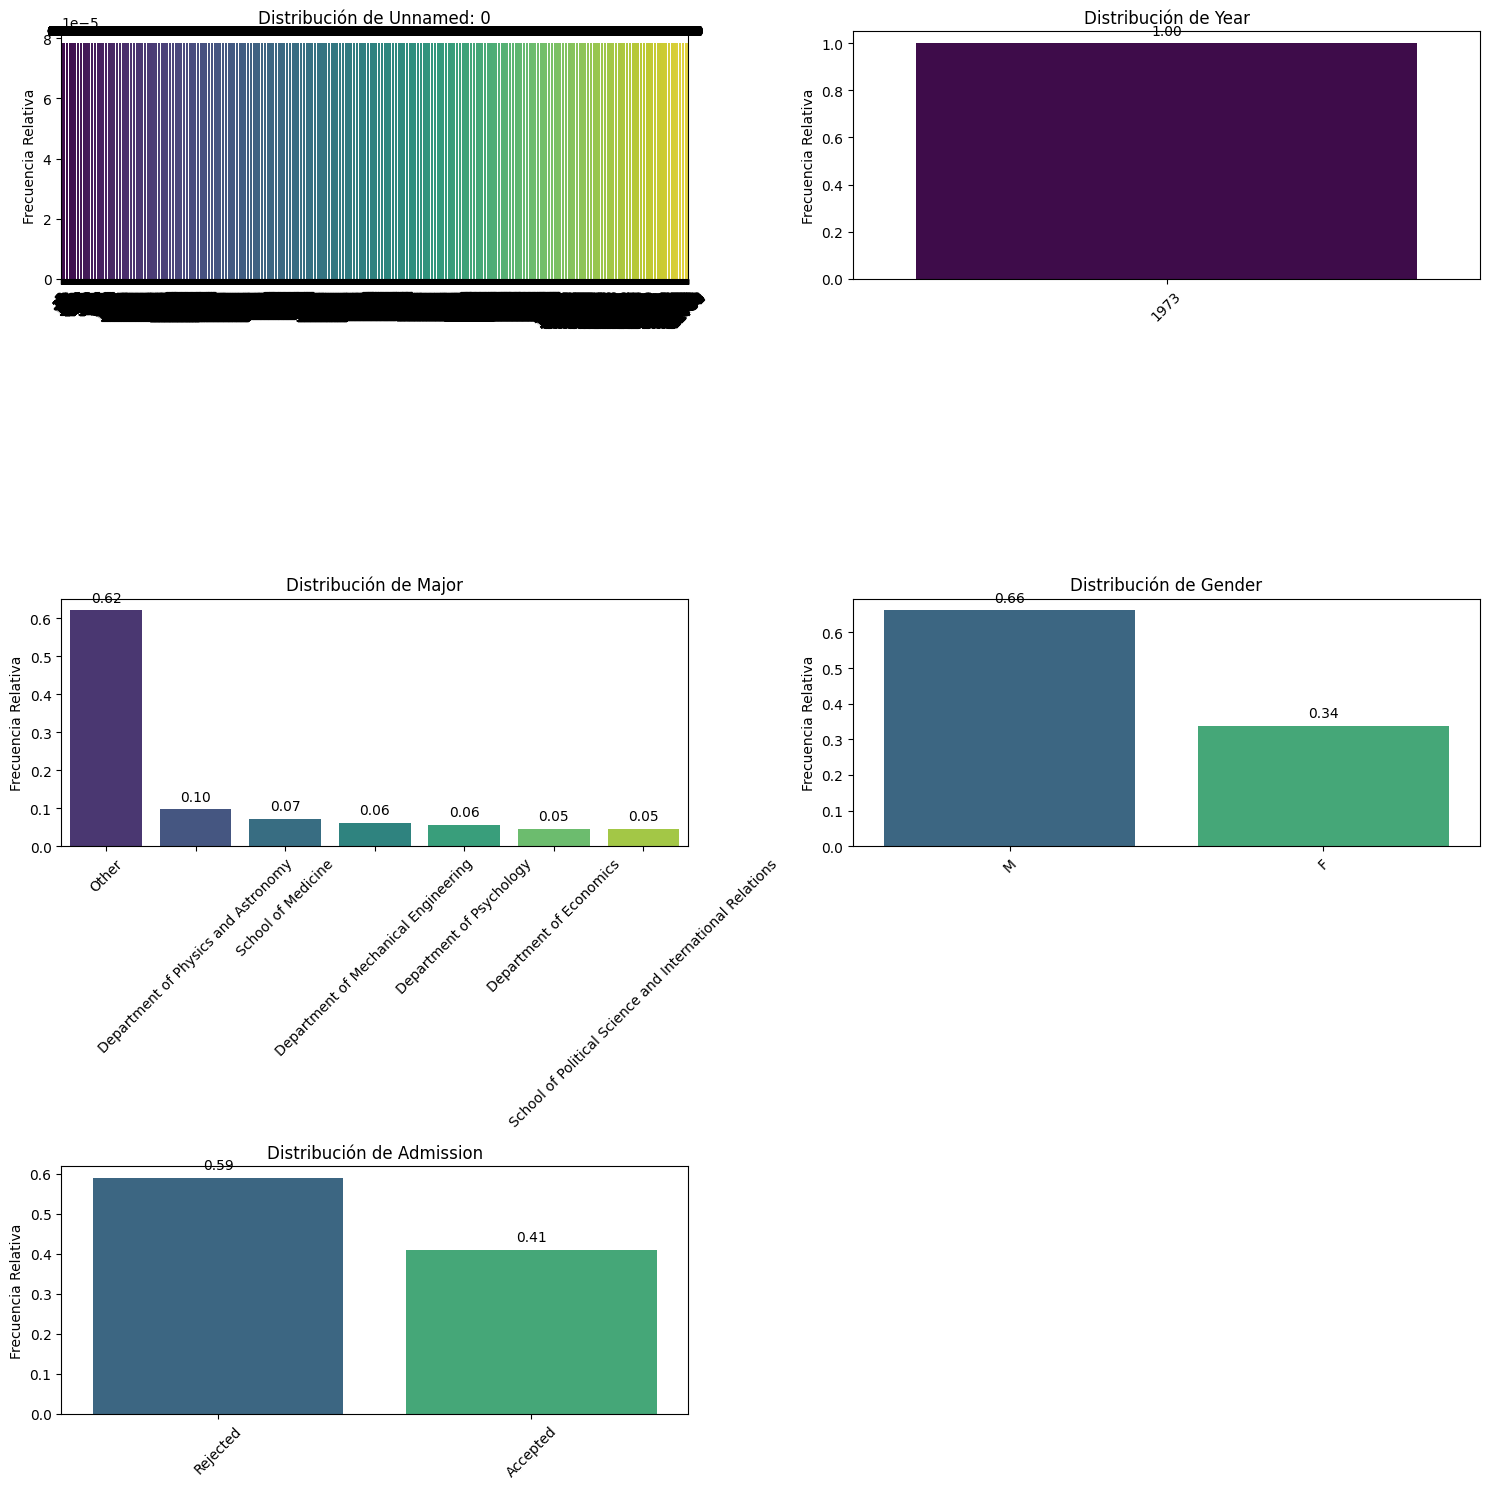

In [17]:
pinta_distribucion_categoricas(df, columnas_categoricas, relativa=True, mostrar_valores=True) # grafica de datos relativos

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

Esta variable requiere investigar en Others ya que es el 62% de los datos.

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [16]:
df.Gender.value_counts()

Gender
M    8442
F    4321
Name: count, dtype: int64

In [18]:
df.Gender.value_counts()/len(df)*100

Gender
M    66.144323
F    33.855677
Name: count, dtype: float64

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

En principio hay un mayor numero de admisiones masculinas que femeninas en un 66%

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [19]:
df.Admission.value_counts()

Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64

In [20]:
df.Admission.value_counts()/len(df)*100

Admission
Rejected    59.006503
Accepted    40.993497
Name: count, dtype: float64

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

Hay un elevado grado de rechazos 59%


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [21]:
df_tips = pd.read_csv("./data/tips.csv")
df_tips.head(10)


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4
6,6,8.77,2.00,Male,No,Sun,Dinner,2
7,7,26.88,3.12,Male,No,Sun,Dinner,4
8,8,15.04,1.96,Male,No,Sun,Dinner,2
9,9,14.78,3.23,Male,No,Sun,Dinner,2


In [22]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [23]:
df_tips.describe()

,Unnamed: 0,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

In [25]:
columnas_tips = list(df_tips.columns)
columnas_tips

['Unnamed: 0', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [27]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

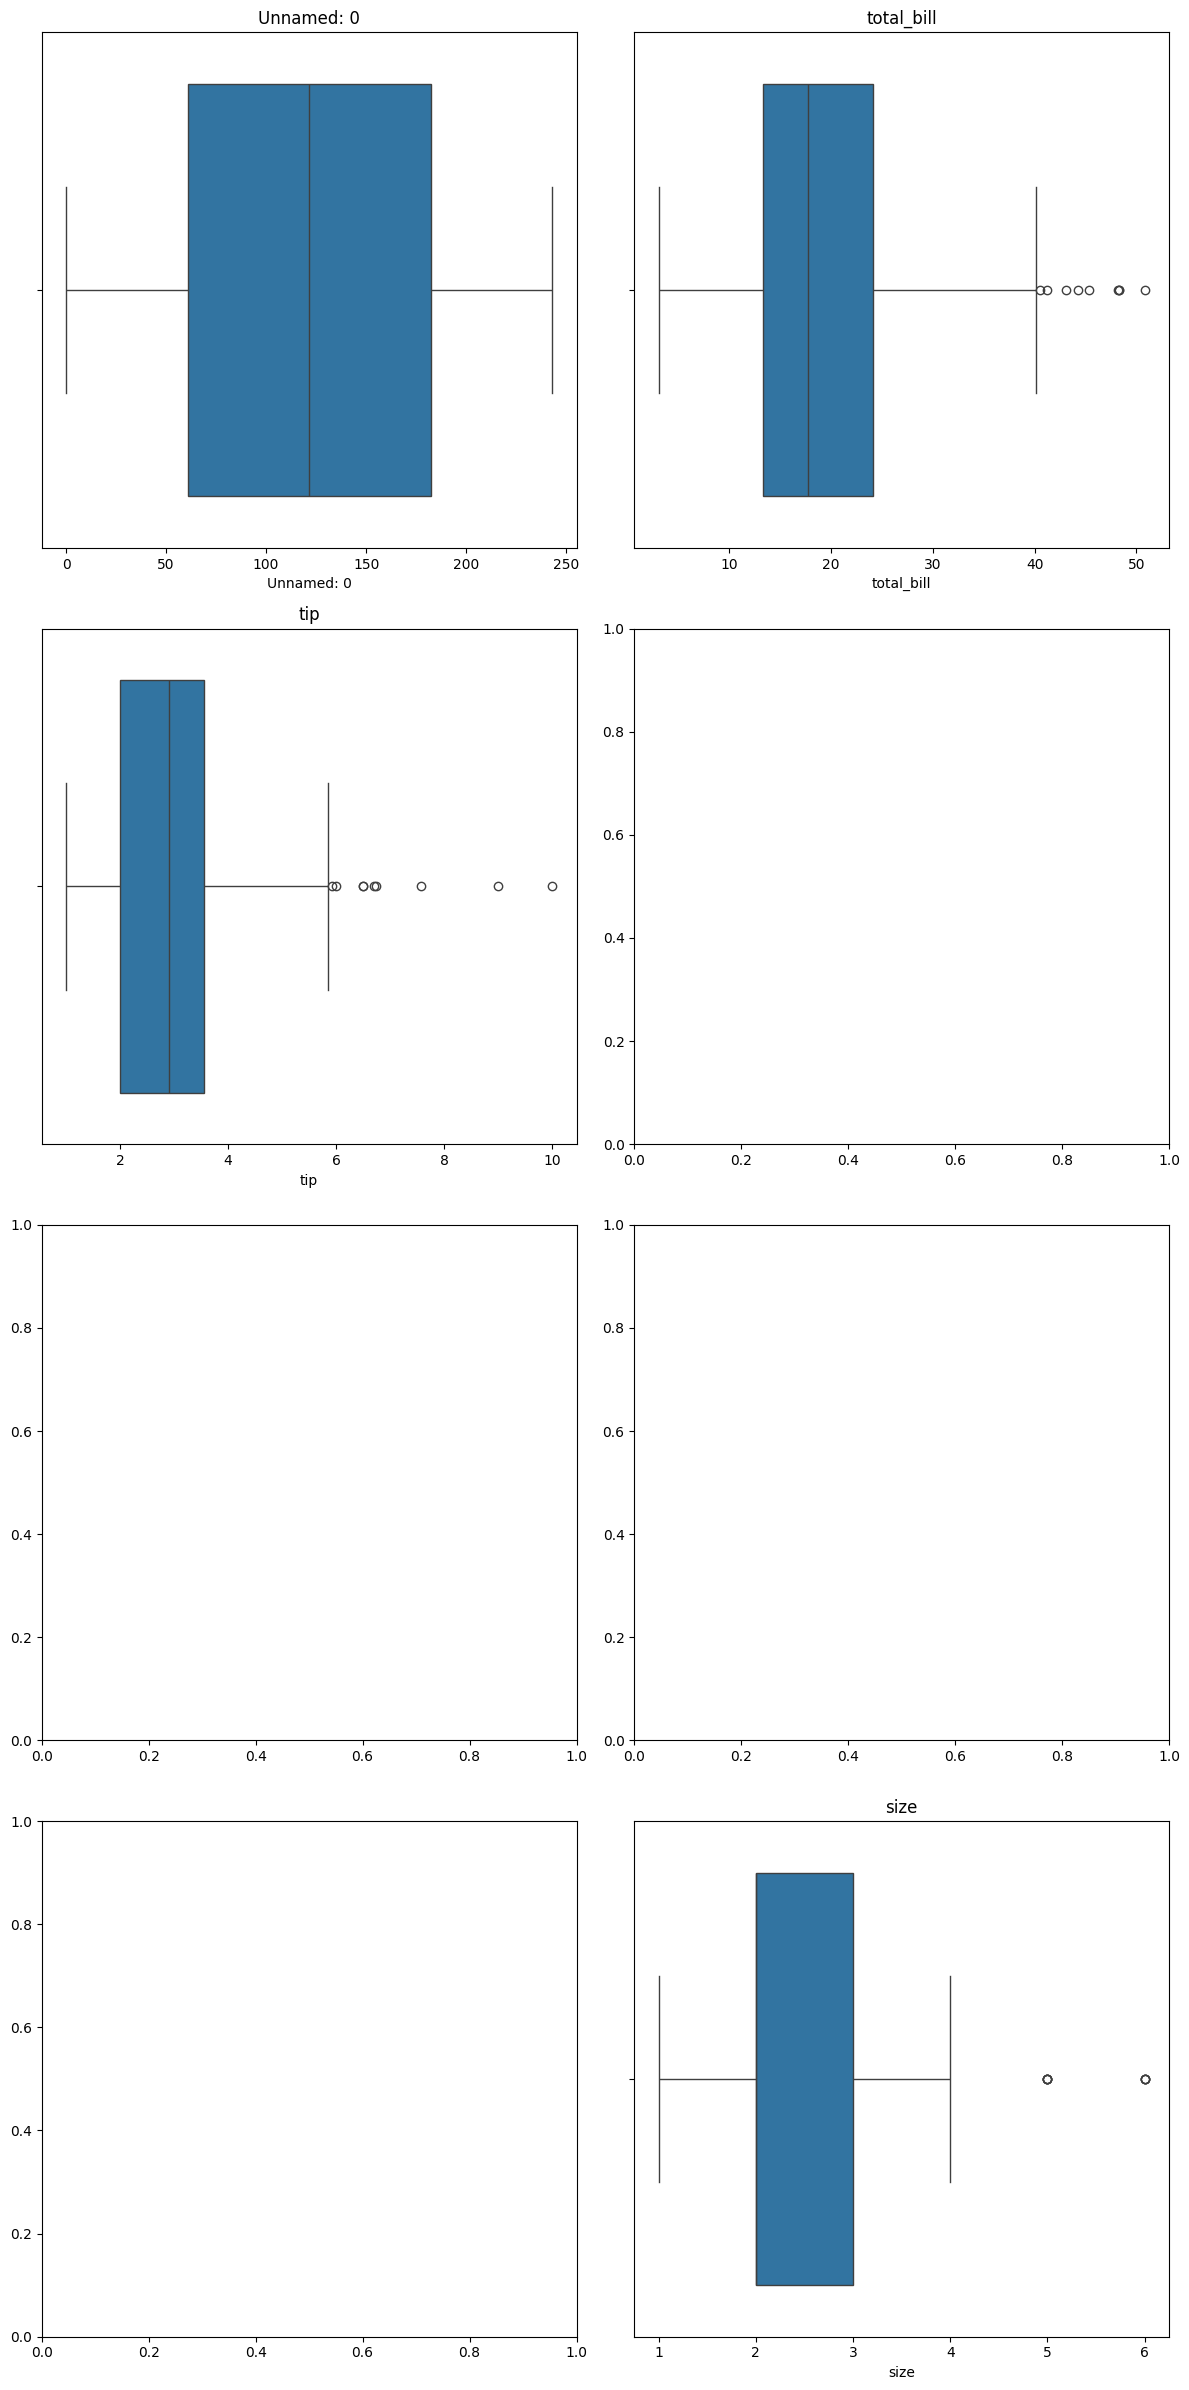

In [28]:
plot_multiple_boxplots(df_tips, columnas_tips)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

In [29]:
for co in columnas_tips:
    print(f"Para {co}")
    print(df_tips[co].value_counts())
    print("\n"*2)

Para Unnamed: 0
Unnamed: 0
0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: count, Length: 244, dtype: int64



Para total_bill
total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64



Para tip
tip
2.00    33
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64



Para sex
sex
Male      157
Female     87
Name: count, dtype: int64



Para smoker
smoker
No     151
Yes     93
Name: count, dtype: int64



Para day
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64



Para time
time
Dinner    176
Lunch      68
Name: count, dtype: int64



Para size
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64





In [30]:
for co in columnas_tips:
    print(f"Para {co}")
    print(df_tips[co].value_counts()/len(df_tips)*100)
    print("\n"*2)

Para Unnamed: 0
Unnamed: 0
0      0.409836
1      0.409836
2      0.409836
3      0.409836
4      0.409836
         ...   
239    0.409836
240    0.409836
241    0.409836
242    0.409836
243    0.409836
Name: count, Length: 244, dtype: float64



Para total_bill
total_bill
13.42    1.229508
21.01    0.819672
20.69    0.819672
10.33    0.819672
10.34    0.819672
           ...   
29.03    0.409836
27.18    0.409836
22.67    0.409836
17.82    0.409836
18.78    0.409836
Name: count, Length: 229, dtype: float64



Para tip
tip
2.00    13.524590
3.00     9.426230
4.00     4.918033
2.50     4.098361
5.00     4.098361
          ...    
1.47     0.409836
1.17     0.409836
4.67     0.409836
5.92     0.409836
1.75     0.409836
Name: count, Length: 123, dtype: float64



Para sex
sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64



Para smoker
smoker
No     61.885246
Yes    38.114754
Name: count, dtype: float64



Para day
day
Sat     35.655738
Sun     31.147541
Thur    25.4

Destacamos que suelen ser cenas, y la propina suele ser canditad redonda 2 eur
2.00    13.524590
3.00     9.426230
4.00     4.918033
2.50     4.098361
5.00     4.09836

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [ ]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_seguros.head(10)

categorias_analizar = ["education", "state", "employmentstatus", "gender", "marital_status", "vehicle_class", "vehicle_size"]

df_seguros[categorias_analizar].mode().T # opcion incorrecta

,0
education,Bachelor
state,California
employmentstatus,Employed
gender,F
marital_status,Married
vehicle_class,Four-Door Car
vehicle_size,Medsize


In [38]:
# Eliminar filas con valores nulos en estas columnas
df_sin_nulos = df_seguros[categorias_analizar].dropna()

# Encontrar la combinacion de valores mas frecuente (perfil tipico)
combinacion_mas_frecuente = df_sin_nulos.value_counts().idxmax()

# Mostrar resultados
print("Perfil típico del cliente:")
print(combinacion_mas_frecuente)

Perfil típico del cliente:
('College', 'California', 'Employed', 'F', 'Married', 'Four-Door Car', 'Medsize')
